<div style="background-color: RGB(255,132,39);" >
<h2 style="margin: auto; padding: 20px; color:#861D00; "> Importation des bibliothèques et des fichiers </h2>
</div>

<div style="background-color: RGB(255,224,132);" >
<h3 style="margin: auto; padding: 20px; color:#861D00; "> Les bibliothèques utilisées </h3>
</div>

In [1]:
# Pour éviter d'avoir les messages warning
import warnings
warnings.filterwarnings('ignore')

# Déclaration des Bibliothèques Principales
import sklearn
import seaborn as sns
from matplotlib.collections import LineCollection
import matplotlib.pyplot as plot
import pandas as panda
import numpy as numpy

from IPython.core.display import display, HTML
# Affichage à l'écran
# Afficher le jupyter notebook à 90% de la taille d'écran
display(HTML("<style>.container { width:90% !important; }</style>"))
# Définir l'option pour afficher toutes les colonnes
panda.set_option('display.max_columns', None)

<div style="background-color: RGB(255,224,132);" >
<h3 style="margin: auto; padding: 20px; color:#861D00; "> Les Fonctions Utilisées </h3>
</div>

<div style="background-color: RGB(255,240,193);" >
<h4 style="margin: auto; padding: 20px; color:#861D00; "> Analyse Dataframe </h4>
</div>

In [2]:
def analyseDataframe(dataframe):
    # Afficher les données du DataFrame
    display(dataframe)
    # Afficher un résumé concis d'un DataFrame.
    display(dataframe.info(verbose=True))
    # Afficher le nombre de lignes et de colonnes
    print("\nLe dataframe contient", dataframe.shape[0], "Lignes et", dataframe.shape[1], "Colonnes" )
    # Générer des statistiques descriptives de la colonne birth
    display(dataframe.describe())  
    #Trouver le nombre des doublons
    doublon = dataframe.duplicated().sum()
    print("\nLe nombre de doublons dans cette table est de" , doublon)
    # Trouver le nombre de Valeurs manquantes
    print("\nLe nombre de valeurs manquantes par colonne dans cette table est de")
    display(dataframe.isnull().sum())
    # Afficher les valeurs manquantes de la colonne margin_low
    display(dataframe[dataframe['margin_low'].isna()])

    

<div style="background-color: RGB(255,240,193);" >
<h4 style="margin: auto; padding: 20px; color:#861D00; "> Anova : Eta-carré </h4>
</div>

In [3]:
def eta_carré(x, y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x == classe]
        classes.append({"ni": len(yi_classe), "moyenne_classe": yi_classe.mean()})
    SommeCarresTotale = sum([(yj - moyenne_y) ** 2 for yj in y])
    SommeCarresExpliques = sum([c["ni"] * (c["moyenne_classe"] - moyenne_y) ** 2 for c in classes])  
    print("l'Eta Carré est de {:.2%}".format(SommeCarresExpliques/SommeCarresTotale))

<div style="background-color: RGB(255,132,39);" >
<h2 style="margin: auto; padding: 20px; color:#861D00; "> Importation du fichier et Visualisation des Données </h2>
</div>

<div style="background-color: RGB(255,224,132);" >
<h3 style="margin: auto; padding: 20px; color:#861D00; "> Import du Fichier </h3>
</div>

In [4]:
# Variable du répertoire d'installation
repertoireFichierImportation = "F:/01. Github/OpenClassrooms/10. Analyse Santé Publique/10. Données/"
# variable pour le nom du fichier à importer
nomFichier1 = "billets-1.csv"
fichierDonnees = panda.read_csv(filepath_or_buffer=repertoireFichierImportation + nomFichier1, sep=';', header=0)

<div style="background-color: RGB(255,224,132);" >
<h3 style="margin: auto; padding: 20px; color:#861D00; "> Visualisation des données </h3>
</div>

In [5]:
# Analyser le dataframe
analyseDataframe(fichierDonnees)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


None


Le dataframe contient 1500 Lignes et 7 Colonnes


,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000



Le nombre de doublons dans cette table est de 0

Le nombre de valeurs manquantes par colonne dans cette table est de


is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


In [6]:
# Afficher les valeurs présentes dans la colonne "Is_geniune"
fichierDonnees["is_genuine"].unique()

array([ True, False])

In [7]:
# Créer le dataframe des Vrais Billets
vraiBillets = fichierDonnees[fichierDonnees["is_genuine"] == True]
# Créer le dataframe des Faux Billets
fauxBillets = fichierDonnees[fichierDonnees["is_genuine"] == False]

In [8]:
# Analyser les vrais billets
analyseDataframe(vraiBillets)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
995,True,171.66,103.92,103.47,4.26,2.83,113.20
996,True,172.16,103.72,103.61,4.30,2.72,113.51
997,True,171.78,103.38,104.22,4.23,3.07,113.77
998,True,171.44,103.96,103.92,3.68,2.89,113.21


<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1000 non-null   bool   
 1   diagonal      1000 non-null   float64
 2   height_left   1000 non-null   float64
 3   height_right  1000 non-null   float64
 4   margin_low    971 non-null    float64
 5   margin_up     1000 non-null   float64
 6   length        1000 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 55.7 KB


None


Le dataframe contient 1000 Lignes et 7 Colonnes


,diagonal,height_left,height_right,margin_low,margin_up,length
count,1000.000000,1000.000000,1000.00000,971.000000,1000.00000,1000.000000
mean,171.987080,103.949130,103.80865,4.116097,3.05213,113.202430
std,0.300441,0.300231,0.29157,0.319124,0.18634,0.359552
min,171.040000,103.140000,102.82000,2.980000,2.27000,111.760000
25%,171.790000,103.740000,103.61000,3.905000,2.93000,112.950000
50%,171.990000,103.950000,103.81000,4.110000,3.05000,113.205000
75%,172.200000,104.140000,104.00000,4.340000,3.18000,113.460000
max,172.920000,104.860000,104.95000,5.040000,3.74000,114.440000



Le nombre de doublons dans cette table est de 0

Le nombre de valeurs manquantes par colonne dans cette table est de


is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      29
margin_up        0
length           0
dtype: int64

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


In [9]:
# Afficher les valeurs manquantes de la colonne margin_low
valeurManquantes = fichierDonnees[fichierDonnees['margin_low'].isna()]
valeurManquantes

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


In [10]:
# Analyser les faux billets
analyseDataframe(fauxBillets)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1000,False,172.28,103.95,103.91,4.78,3.31,111.40
1001,False,171.92,103.86,104.30,4.96,3.13,111.29
1002,False,171.59,104.14,104.38,4.97,3.47,111.22
1003,False,172.02,104.33,104.33,5.19,3.21,111.99
1004,False,172.55,104.25,104.23,5.60,3.13,111.72
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 1000 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    500 non-null    bool   
 1   diagonal      500 non-null    float64
 2   height_left   500 non-null    float64
 3   height_right  500 non-null    float64
 4   margin_low    492 non-null    float64
 5   margin_up     500 non-null    float64
 6   length        500 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 27.8 KB


None


Le dataframe contient 500 Lignes et 7 Colonnes


,diagonal,height_left,height_right,margin_low,margin_up,length
count,500.000000,500.000000,500.000000,492.000000,500.000000,500.000000
mean,171.901160,104.190340,104.143620,5.215935,3.350160,111.630640
std,0.306861,0.223758,0.270878,0.553531,0.180498,0.615543
min,171.040000,103.510000,103.430000,3.820000,2.920000,109.490000
25%,171.690000,104.040000,103.950000,4.840000,3.220000,111.200000
50%,171.910000,104.180000,104.160000,5.190000,3.350000,111.630000
75%,172.092500,104.332500,104.320000,5.592500,3.472500,112.030000
max,173.010000,104.880000,104.950000,6.900000,3.910000,113.850000



Le nombre de doublons dans cette table est de 0

Le nombre de valeurs manquantes par colonne dans cette table est de


is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      8
margin_up       0
length          0
dtype: int64

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1076,False,171.57,104.27,104.44,NaN,3.21,111.87
1121,False,171.40,104.38,104.19,NaN,3.17,112.39
1176,False,171.59,104.05,103.94,NaN,3.02,111.29
1303,False,172.17,104.49,103.76,NaN,2.93,111.21
1315,False,172.08,104.15,104.17,NaN,3.40,112.29
1347,False,171.72,104.46,104.12,NaN,3.61,110.31
1435,False,172.66,104.33,104.41,NaN,3.56,111.47
1438,False,171.90,104.28,104.29,NaN,3.24,111.49


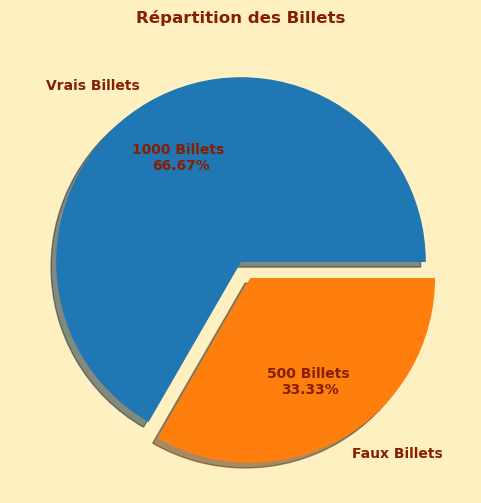

In [11]:
# Total de Billets
nbBillets = len(fichierDonnees["is_genuine"])
# On definit la taille du Pie plot ainsi que sa couleur
plot.figure(figsize = (6, 6)).patch.set_facecolor('#fff0c1')
# On regle et on affiche le Pie plot
plot.pie(x = fichierDonnees.is_genuine.value_counts(normalize = True), # Nombre d'entrée du graphique 
            labels=['Vrais Billets', 'Faux Billets'], #les noms affichés
            textprops = dict(color = '#861e00', fontweight = 'bold'), # Couleurs du texte
            explode = [0, 0.1], # Décallage des camemberts
            autopct = lambda x: f"{x / 100 * nbBillets:.0f} Billets \n" + str(round(x, 2)) + '%',
            pctdistance = 0.65, labeldistance = 1.1, #Distance texte dans Camembert et à l'extérieur
            shadow = True) #Ombre
plot.title('Répartition des Billets', color = '#861e00', fontweight = 'bold'); #Titre en gras et Couleur

In [12]:
# Regrouper les variables 
fichierDonnees.groupby(by='is_genuine').mean()

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
False,171.90116,104.19034,104.14362,5.215935,3.35016,111.63064
True,171.98708,103.94913,103.80865,4.116097,3.05213,113.20243


<div style="background-color: RGB(255,132,39);" >
<h2 style="margin: auto; padding: 20px; color:#861D00; "> Nettoyage et Exploration </h2>
</div>

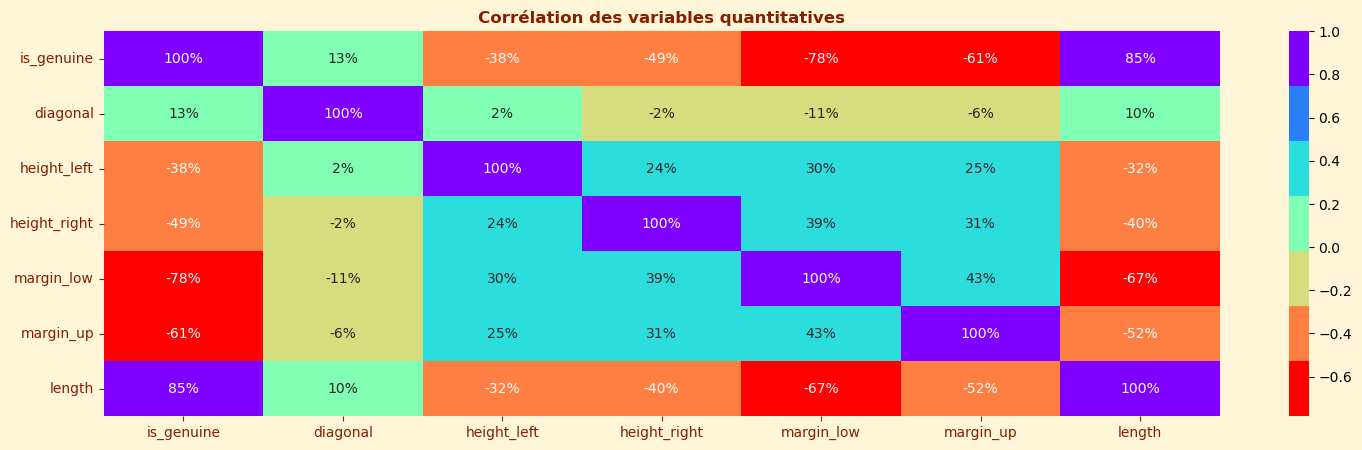

In [13]:
# Heatmap de la correlation
plot.figure(figsize=(18,5)).patch.set_facecolor('#fff6d9')
plot.gca().set_facecolor('#fff6d9') # Couleur de fond
plot.gca().tick_params(colors='#861e00') # changement couleur des axes x et y
plot.gca().spines[:].set_visible(False) # Masquage du cadre noir
plot.gca().tick_params(colors='#861e00') # changement couleur des axes x et y
sns.heatmap(fichierDonnees.corr(), annot=True, fmt=".0%", cmap=plot.cm.get_cmap("rainbow_r", 7)) # Afficher de la carte
plot.title('Corrélation des variables quantitatives', color = '#861e00', fontweight = 'bold') # Titre
plot.show() # Afficher le graphique

<div style="background-color: RGB(255,224,132);" >
<h3 style="margin: auto; padding: 20px; color:#861D00; "> Effet de la variable qualitative sur la variable quantitative </h3>
</div>

In [14]:
# Définition des 2 variables à Analyser
X = "is_genuine"  # qualitative
Y = "length"  # quantitative
# Afficher la valeur de l'Eta Carré
eta_carré(fichierDonnees[X], fichierDonnees[Y])

l'Eta Carré est de 72.13%


In [15]:
# Définition des 2 variables à Analyser
X = "is_genuine"  # qualitative
Y = "margin_up"  # quantitative
# Afficher la valeur de l'Eta Carré
eta_carré(fichierDonnees[X], fichierDonnees[Y])

l'Eta Carré est de 36.76%


In [16]:
# Définition des 2 variables à Analyser
X = "is_genuine"  # qualitative
Y = "diagonal"  # quantitative
# Afficher la valeur de l'Eta Carré
eta_carré(fichierDonnees[X], fichierDonnees[Y])

l'Eta Carré est de 1.76%


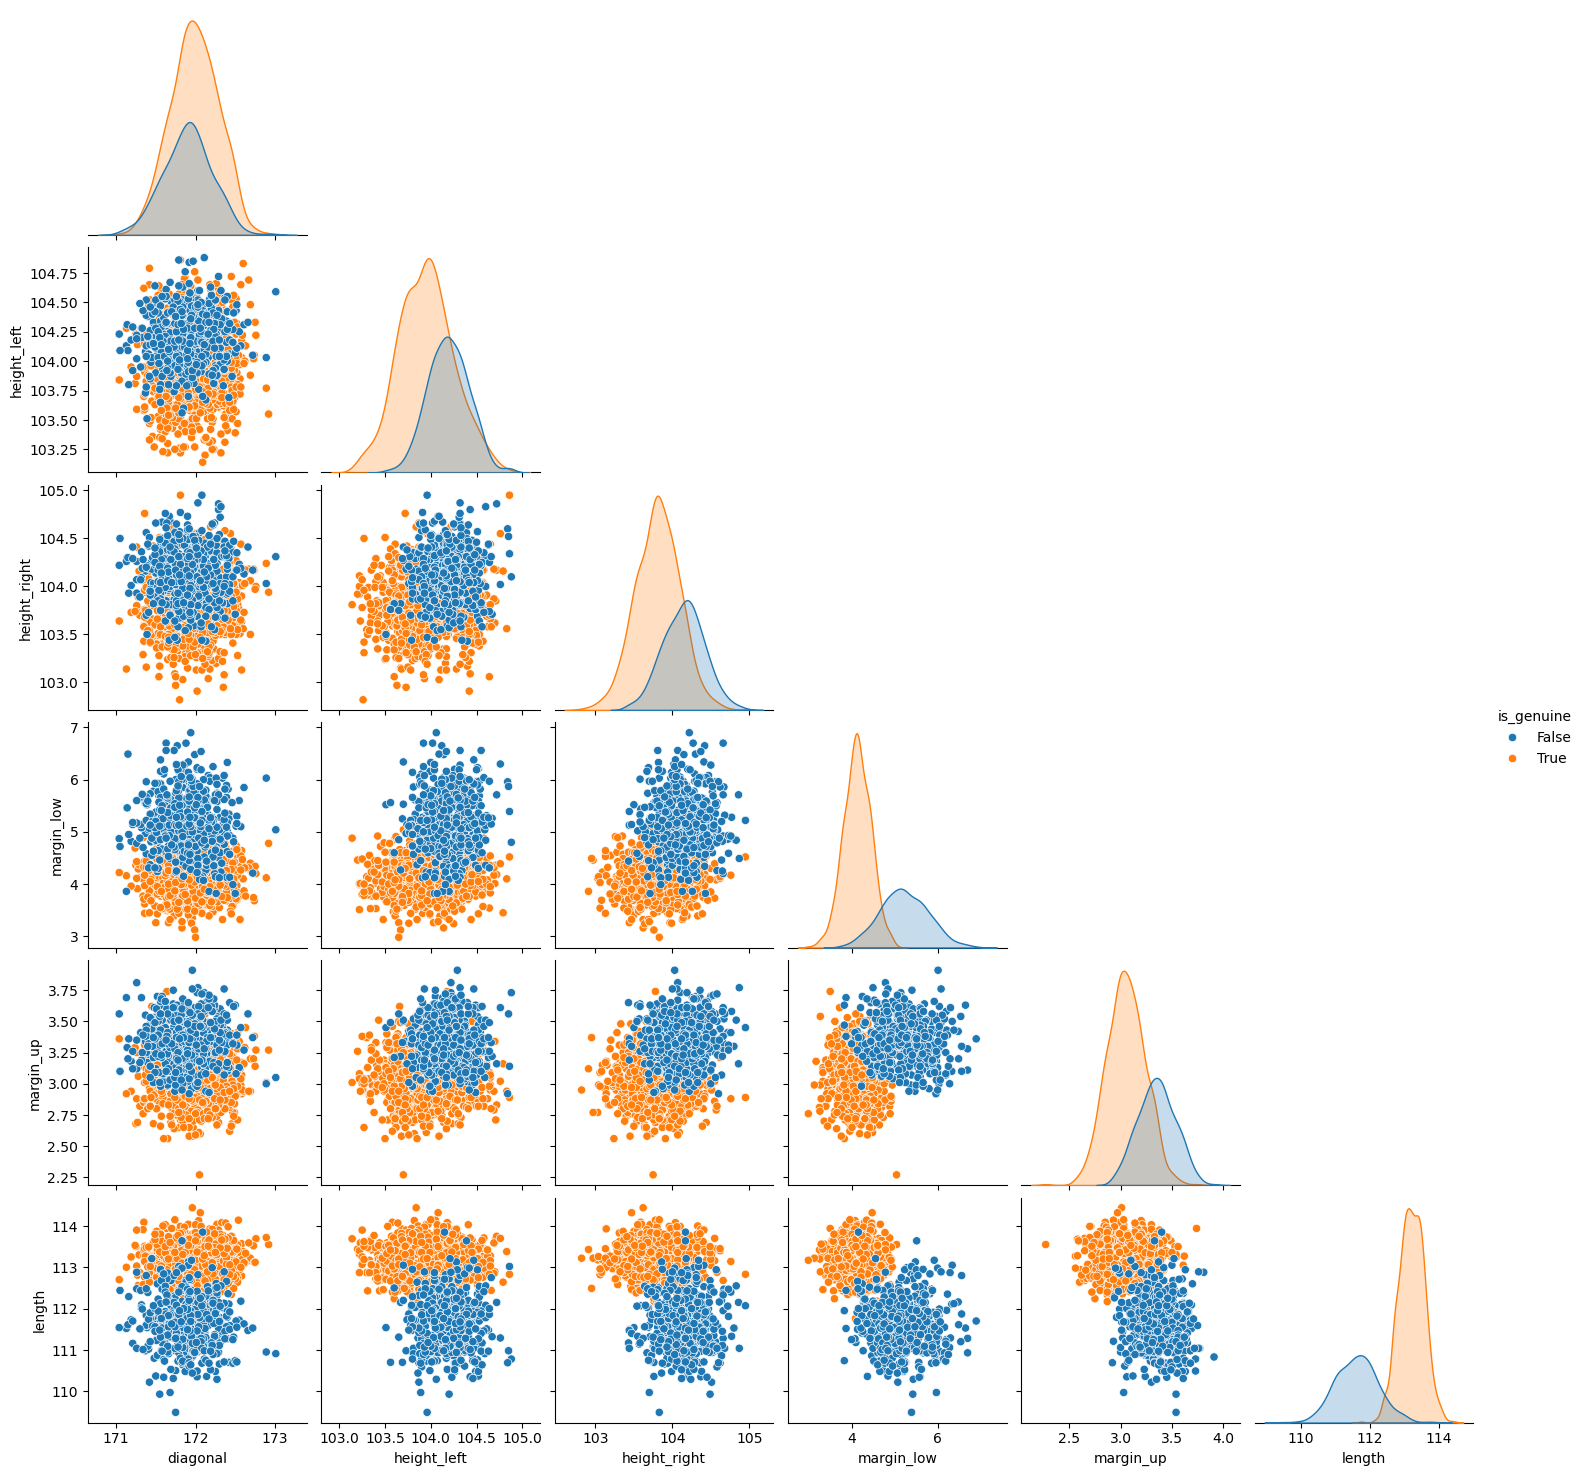

In [17]:
# Visualiser les rélations entre chaque paire de Variables
sns.pairplot(fichierDonnees, hue="is_genuine", corner=True)

In [18]:
def Coloriage() :
    plot.gca().set_facecolor('#fff6d9') # Couleur de fond
    plot.gca().tick_params(colors='#861e00') # changement couleur des axes x et y
    plot.gca().spines[:].set_visible(False) # Masquage du cadre noir
    plot.gca().tick_params(colors='#861e00') # changement couleur des axes x et y
    plot.xlabel("is_genuine", color='#861e00', fontweight='bold')  # Titre axe des X

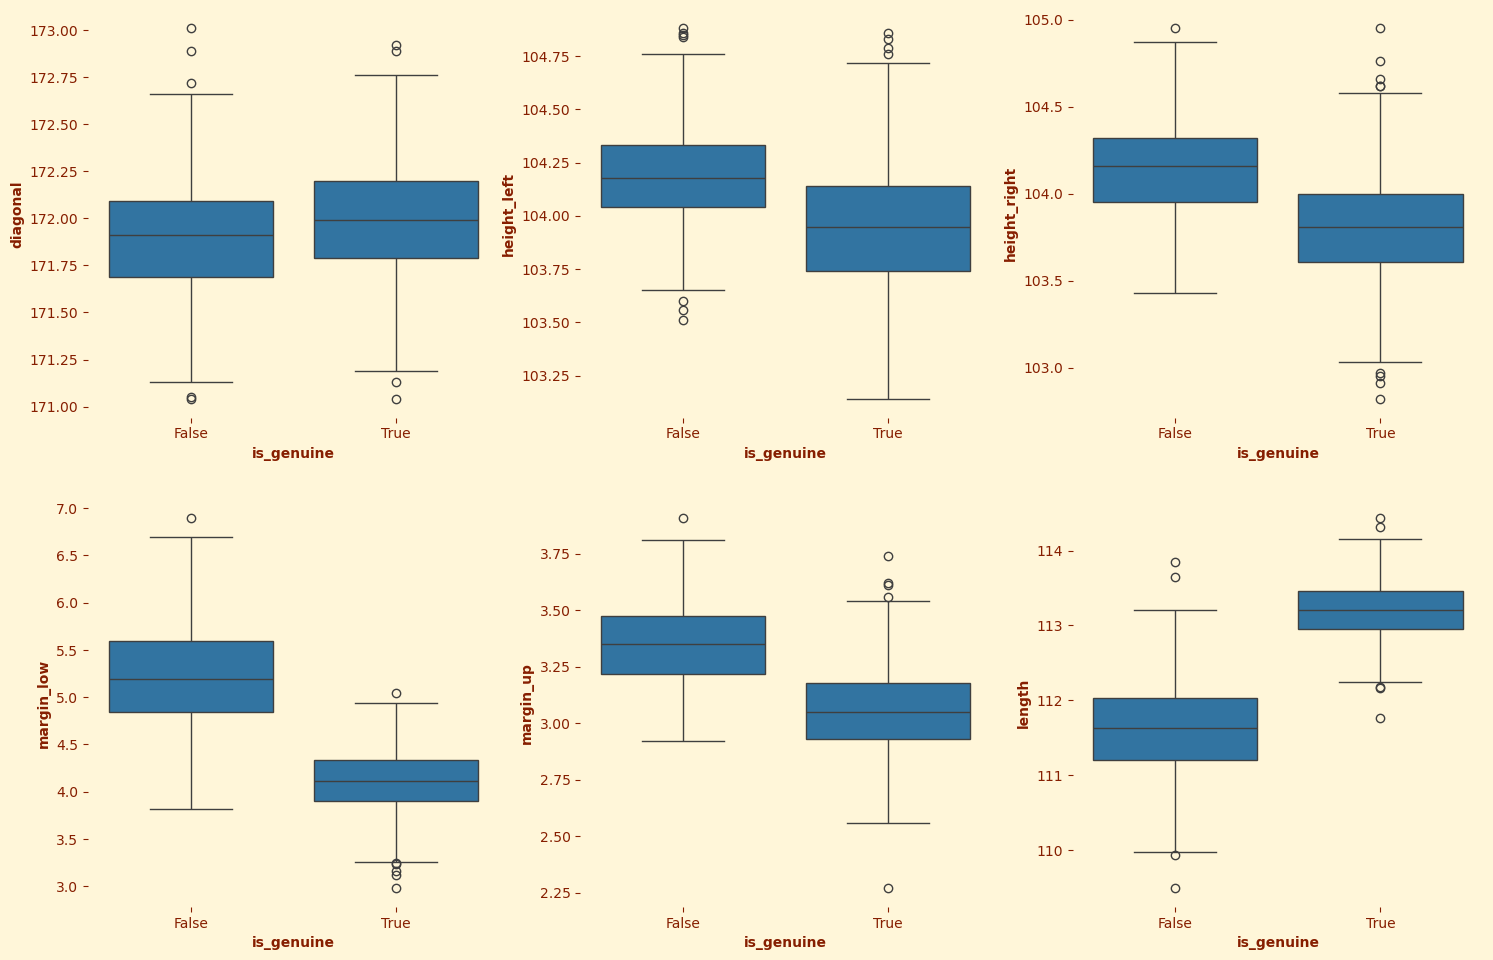

In [19]:
# Comparaison des variables par Boxplot  la colonne is_genuine est en abscisse et les différentes variables en ordonnée
plot.figure(figsize=(18,18)).patch.set_facecolor('#fff6d9')

plot.subplot(331)
sns.boxplot(data=fichierDonnees, x='is_genuine', y='diagonal')
plot.ylabel("diagonal", color='#861e00', fontweight='bold')  # Titre axe des X
Coloriage()

plot.subplot(332)
sns.boxplot(data=fichierDonnees, x='is_genuine', y='height_left')
plot.ylabel("height_left", color='#861e00', fontweight='bold')  # Titre axe des X
Coloriage()

plot.subplot(333)
sns.boxplot(data=fichierDonnees, x='is_genuine', y='height_right')
plot.ylabel("height_right", color='#861e00', fontweight='bold')  # Titre axe des X
Coloriage()

plot.subplot(334)
sns.boxplot(data=fichierDonnees, x='is_genuine', y='margin_low')
plot.ylabel("margin_low", color='#861e00', fontweight='bold')  # Titre axe des X
Coloriage()

plot.subplot(335)
sns.boxplot(data=fichierDonnees, x='is_genuine', y='margin_up')
plot.ylabel("margin_up", color='#861e00', fontweight='bold')  # Titre axe des X
Coloriage()

plot.subplot(336)
sns.boxplot(data=fichierDonnees, x='is_genuine', y="length")
plot.ylabel("length", color='#861e00', fontweight='bold')  # Titre axe des X
Coloriage()

plot.show()

In [20]:
import statsmodels.formula.api as smf
# Calculer la regression Linéaire entre la variable dependante margin_low et les variables indépendantes margin_up et is_genuine
resultat = smf.ols('margin_low ~ is_genuine + margin_up', data=fichierDonnees).fit()
# Afficher le résultat
resultat.summary()

# Regarder les différents tests pour les résultats

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                Thu, 23 Oct 2025   Prob (F-statistic):          1.24e-304
Time:                        18:46:17   Log-Likelihood:                -774.73
No. Observations:                1463   AIC:                             1555.
Df Residuals:                    1460   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.9263      0.198     30.003      0.000       5.539       6.314
is_genuine[T.True]    -1.1632      0.029    -40.477      0.000      -1.220      -1.107
margin_up             -0.2119      0.059     -3.612      0.000      -0.327      -0.097
==============================================================================
Omnibus:                       22.365   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.106
Skew:                           0.057   Prob(JB):                     3.22e-09
Kurtosis:                       3.793   Cond. No.                         65.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Le coefficient de détermination $R^{2}$ est de l'ordre de 0.6, ce n'est pas très élevé mais vu la dispersion c'est normal

__Le $R^{2}$ nous montre a quel point notre modèle est meilleur que simplement utiliser la moyenne, plus il est proche de 1, mieux c'est.__

<div style="background-color: RGB(255,132,39);" >
<h2 style="margin: auto; padding: 20px; color:#861D00; "> Résidus </h2>
</div>

In [21]:
# Afficher le résultat de la somme des carrés expliqués
resultat.ssr

np.float64(247.0183220765208)

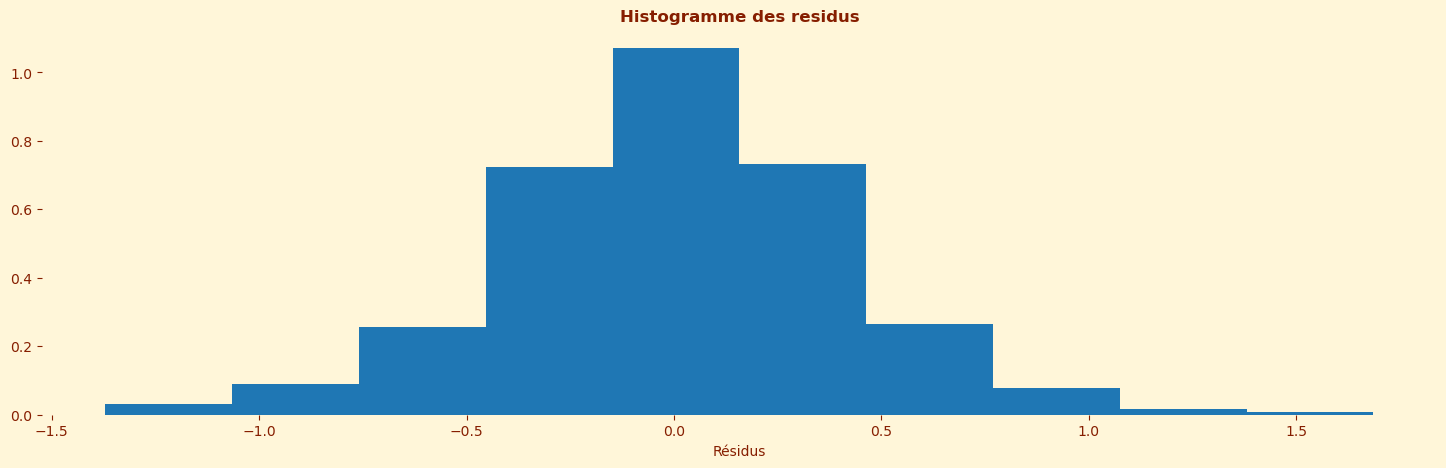

In [22]:
# Graphique en nuage de point plot.figure()
plot.figure(figsize = (18, 5)).patch.set_facecolor('#fff6d9')
plot.gca().set_facecolor('#fff6d9') # Couleur de fond
plot.gca().tick_params(colors='#861e00') # changement couleur des axes x et y
plot.gca().spines[:].set_visible(False) # Masquage du cadre noir
# Afficher les données
plot.hist(resultat.resid, density=True)
plot.xlabel('Résidus', color = '#861e00')
plot.title("Histogramme des residus", color = '#861e00', fontweight = 'bold')
plot.show()

In [23]:
import statsmodels.stats.api as sms
# test de Breuschpagan
_, pval, __, f_pval = sms.diagnostic.het_breuschpagan(resultat.resid, resultat.model.exog)
print('La p-value du test Breusch Pagan est de:', f'{pval:.50f}')

La p-value du test Breusch Pagan est de: 0.00000000000000000000000000000000000320335591158363


<div style="background-color: RGB(255,132,39);" >
<h2 style="margin: auto; padding: 20px; color:#861D00; "> Normalité des Résidus </h2>
</div>

In [24]:
from scipy.stats import shapiro
# Test de Shapiro Wilk
ShapiroResidu = shapiro(resultat.resid)
print("La p-value du test de Shapiro Wilk est de: "f'{ShapiroResidu.pvalue:.20f}')

La p-value du test de Shapiro Wilk est de: 0.00000621444675043686


L'hypthèse de normalité est remise en cause car la P-Value est inférieure à 5%


<div style="background-color: RGB(255,132,39);" >
<h2 style="margin: auto; padding: 20px; color:#861D00; "> Modelisation </h2>
</div>

In [25]:
# Prévoir la marge basse en fonction de la marge haute et de l'authenticité du'un billet
a_prevoir = fichierDonnees[["is_genuine", "margin_up"]]
fichierDonnees["margin_low_prediction"] = resultat.predict(a_prevoir)

In [26]:
# Copier les résultat dans un nouveau Dataframe
training_set_complet = fichierDonnees.copy()
# Remplacer les valeurs margin low manquante par la prediction
training_set_complet["margin_low"] = fichierDonnees["margin_low"].fillna(value=fichierDonnees["margin_low_prediction"])

<div style="background-color: RGB(255,224,132);" >
<h3 style="margin: auto; padding: 20px; color:#861D00; "> Création des jeux de données d'entrainement et de Test </h3>
</div>

In [27]:
from sklearn.model_selection import train_test_split

# Création du modèles d'entrainement des données et du modèle de test pour l'évaluation du modèle
training_set, test_set = train_test_split(training_set_complet, train_size=0.8, stratify=training_set_complet["is_genuine"])
feature_cols = ["diagonal", "height_left", "height_right", "margin_low", "margin_up", "length"]
X_train = training_set[feature_cols]
y_train = training_set.is_genuine

X_test = test_set[feature_cols]
y_test = test_set.is_genuine

print('Train Set:', X_train.shape)
print('Test Set:', X_test.shape)

Train Set: (1200, 6)
Test Set: (300, 6)


<div style="background-color: RGB(255,224,132);" >
<h3 style="margin: auto; padding: 20px; color:#861D00; "> Centrage et Réduction </h3>
</div>

In [28]:
from sklearn.preprocessing import StandardScaler
# Prendre uniquement les valeurs numériques pour les données d'entrainement
X_train_valeur = training_set[feature_cols].values
# centrage et réduction des données d'entrainement 
standard_scaler = sklearn.preprocessing.StandardScaler().fit(X_train_valeur)
X_train_scaled = standard_scaler.transform(X_train_valeur)

# Attention à l'erreur, ne pas prendre X_Train mais bien X_train_Valeur

In [29]:
# Prendre uniquement les valeurs numériques pour les données de test
X_test_valeur  = test_set[feature_cols].values
# centrage et réduction test
standard_scaler = sklearn.preprocessing.StandardScaler().fit(X_test_valeur)
X_test_scaled = standard_scaler.transform(X_test_valeur)

<div style="background-color: RGB(255,224,132);" >
<h3 style="margin: auto; padding: 20px; color:#861D00; "> Régression Logistique  avec les valeurs centrées réduites </h3>
</div>

Utilisation de la régression logistique de sk-learn pour prévoir les valeurs de is_genuine sur notre dataframe de test

D'abord avec les valeurs centrées réduites

In [30]:
from sklearn import linear_model

# Transformer les données en Dataframe
scaled_train_df = panda.DataFrame(X_train_scaled, columns=feature_cols)
scaled_test_df = panda.DataFrame(X_test_scaled, columns=feature_cols)

# Entrainement du modèle avec la regression logistique
modeleRegressionLogistique = linear_model.LogisticRegression(random_state=10).fit(scaled_train_df, y_train)

In [31]:
# Tester le modèle sur les données de test.
a_prevoir = scaled_test_df[feature_cols]
y_pred = modeleRegressionLogistique.predict(a_prevoir)
test_set["is_genuine_predicted_scaled_lg"] = y_pred

In [32]:
# Vérifier les données non cohérentes entre les deux colonnes
test_set.loc[test_set["is_genuine"] != test_set["is_genuine_predicted_scaled_lg"]]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,margin_low_prediction,is_genuine_predicted_scaled_lg
1122,False,172.09,104.15,104.17,4.15,3.40,113.85,5.205657,True
1103,False,171.88,104.05,103.75,4.41,3.21,112.52,5.245925,True
728,True,171.94,104.11,104.16,4.08,3.35,111.76,4.053054,False


<div style="background-color: RGB(255,224,132);" >
<h3 style="margin: auto; padding: 20px; color:#861D00; "> Régression Logistique sans la réduction et le centrage </h3>
</div>

In [33]:
# Sans centrage et sans reduction
modeleRegressionLogistique = linear_model.LogisticRegression(random_state=10).fit(X_train, y_train)
# Tester le modèle sur les données de test.
a_prevoir = test_set[feature_cols]
y_pred = modeleRegressionLogistique.predict(a_prevoir)
test_set["is_genuine_predicted_lg"] = y_pred

In [34]:
# Vérifier les données non cohérentes entre les deux colonnes
test_set.loc[test_set["is_genuine"] != test_set["is_genuine_predicted_lg"]]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,margin_low_prediction,is_genuine_predicted_scaled_lg,is_genuine_predicted_lg
1122,False,172.09,104.15,104.17,4.15,3.40,113.85,5.205657,True,True
1325,False,171.83,104.39,104.17,5.51,3.33,113.64,5.220493,False,True
0,True,171.81,104.86,104.95,4.52,2.89,112.83,4.150546,True,False
1103,False,171.88,104.05,103.75,4.41,3.21,112.52,5.245925,True,True
728,True,171.94,104.11,104.16,4.08,3.35,111.76,4.053054,False,False


<div style="background-color: RGB(255,224,132);" >
<h3 style="margin: auto; padding: 20px; color:#861D00; "> Mesure de performance du modèle </h3>
</div>

In [35]:
from sklearn.metrics import classification_report

# Rapport de classification
print(classification_report(y_test, test_set['is_genuine_predicted_scaled_lg']))

              precision    recall  f1-score   support

       False       0.99      0.98      0.98       100
        True       0.99      0.99      0.99       200

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [36]:
# Rapport de classification
print(classification_report(y_test, test_set['is_genuine_predicted_lg']))

              precision    recall  f1-score   support

       False       0.98      0.97      0.97       100
        True       0.99      0.99      0.99       200

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



In [37]:
from sklearn.metrics import accuracy_score 
# Calculer l'accuracy directement
print("Accuracy:", accuracy_score(y_test, test_set["is_genuine_predicted_lg"]))

Accuracy: 0.9833333333333333


<div style="background-color: RGB(255,224,132);" >
<h3 style="margin: auto; padding: 20px; color:#861D00; "> Matrice de Confusion  </h3>
</div>

<div style="background-color: RGB(255,240,193);" >
<h4 style="margin: auto; padding: 20px; color:#861D00; "> Regression Logistique avec Standardisation </h4>
</div>

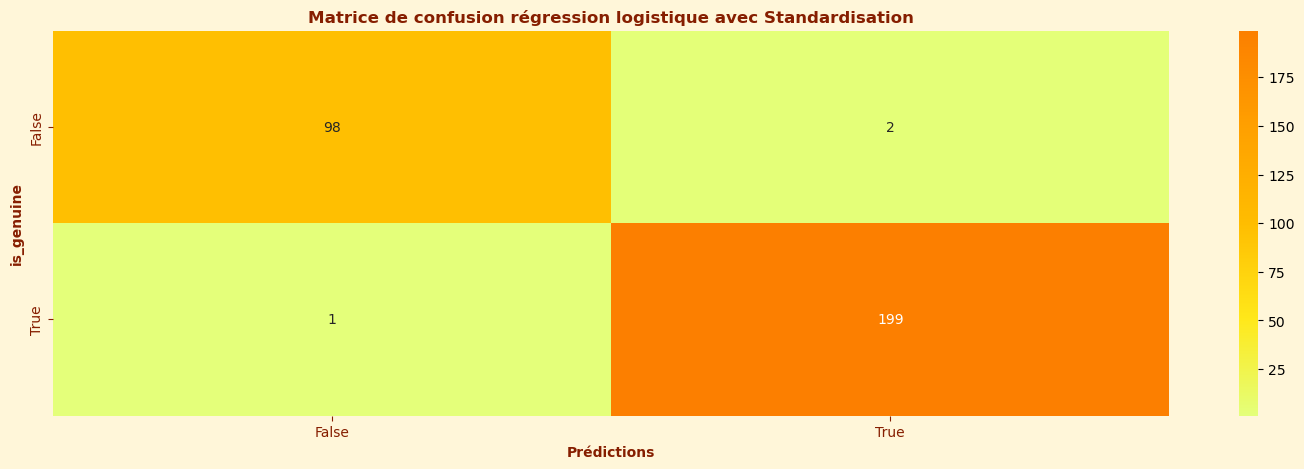

In [38]:
configuration_matrice_modeleRegressionLogistique = panda.crosstab(y_test, test_set['is_genuine_predicted_scaled_lg'])

plot.figure(figsize=(18,5)).patch.set_facecolor('#fff6d9')
plot.gca().set_facecolor('#fff6d9') # Couleur de fond
plot.gca().tick_params(colors='#861e00') # changement couleur des axes x et y
plot.gca().spines[:].set_visible(False) # Masquage du cadre noir
plot.gca().tick_params(colors='#861e00') # changement couleur des axes x et y
sns.heatmap(configuration_matrice_modeleRegressionLogistique, annot=True, fmt=".3g", cmap='Wistia') # Afficher de la carte
plot.title('Matrice de confusion régression logistique avec Standardisation', color = '#861e00', fontweight = 'bold') # Titre
plot.xlabel("Prédictions",  color = '#861e00', fontweight = 'bold')
plot.ylabel("is_genuine",  color = '#861e00', fontweight = 'bold')
plot.show()

<div style="background-color: RGB(255,240,193);" >
<h4 style="margin: auto; padding: 20px; color:#861D00; "> Regression Logistique sans Standardisation </h4>
</div>

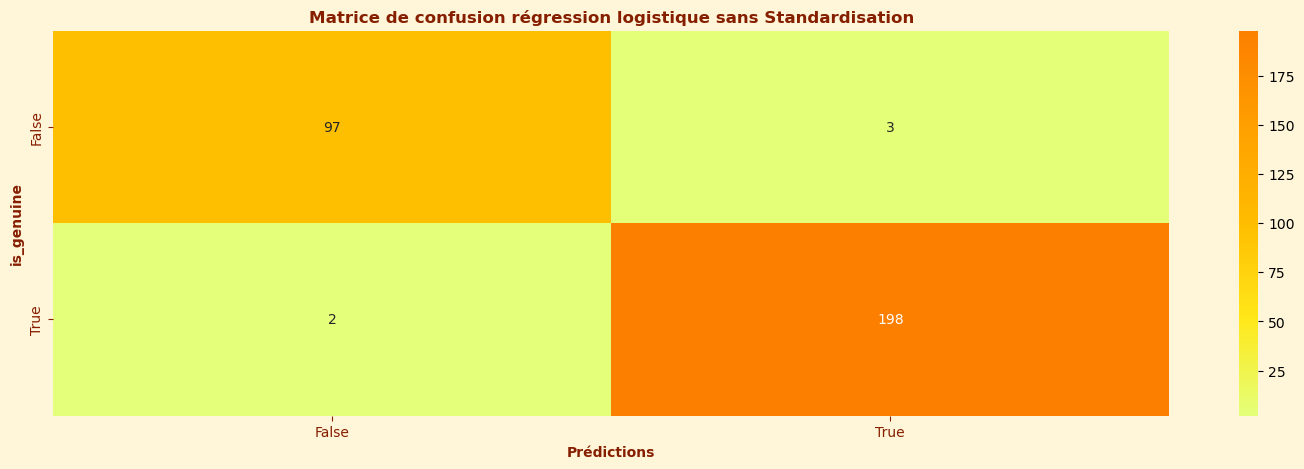

In [39]:
configuration_matrice_modeleRegressionLogistique = panda.crosstab(y_test, test_set['is_genuine_predicted_lg'])

plot.figure(figsize=(18,5)).patch.set_facecolor('#fff6d9')
plot.gca().set_facecolor('#fff6d9') # Couleur de fond
plot.gca().tick_params(colors='#861e00') # changement couleur des axes x et y
plot.gca().spines[:].set_visible(False) # Masquage du cadre noir
plot.gca().tick_params(colors='#861e00') # changement couleur des axes x et y
sns.heatmap(configuration_matrice_modeleRegressionLogistique, annot=True, fmt=".3g", cmap='Wistia') # Afficher de la carte
plot.title('Matrice de confusion régression logistique sans Standardisation', color = '#861e00', fontweight = 'bold') # Titre
plot.xlabel("Prédictions",  color = '#861e00', fontweight = 'bold')
plot.ylabel("is_genuine",  color = '#861e00', fontweight = 'bold')
plot.show()

<div style="background-color: RGB(255,224,132);" >
<h3 style="margin: auto; padding: 20px; color:#861D00; "> Kmean  </h3>
</div>

<div style="background-color: RGB(255,240,193);" >
<h4 style="margin: auto; padding: 20px; color:#861D00; "> Dendogramme </h4>
</div>

In [40]:
def plot_dendrogram(Z, names, NomGraphique):
    plot.figure(figsize = (18, 6)).patch.set_facecolor('#fff6d9')
    plot.gca().set_facecolor('#fff6d9') # Couleur de fond
    plot.gca().tick_params(colors='#861e00') # changement couleur des axes x et y
    plot.gca().spines[:].set_visible(False) # Masquage du cadre noir
    plot.title(NomGraphique, color = '#861e00', fontweight = 'bold')
    plot.ylabel('Distance',  color = '#861e00', fontweight = 'bold')
    dendrogram(Z,labels = names,orientation = "top")
    plot.show()

In [41]:
# dendogramme
X = scaled_test_df
from scipy.cluster.hierarchy import dendrogram, linkage
# Clustering hiérarchique avec StandardScaler
Z1 = linkage(X, 'ward')

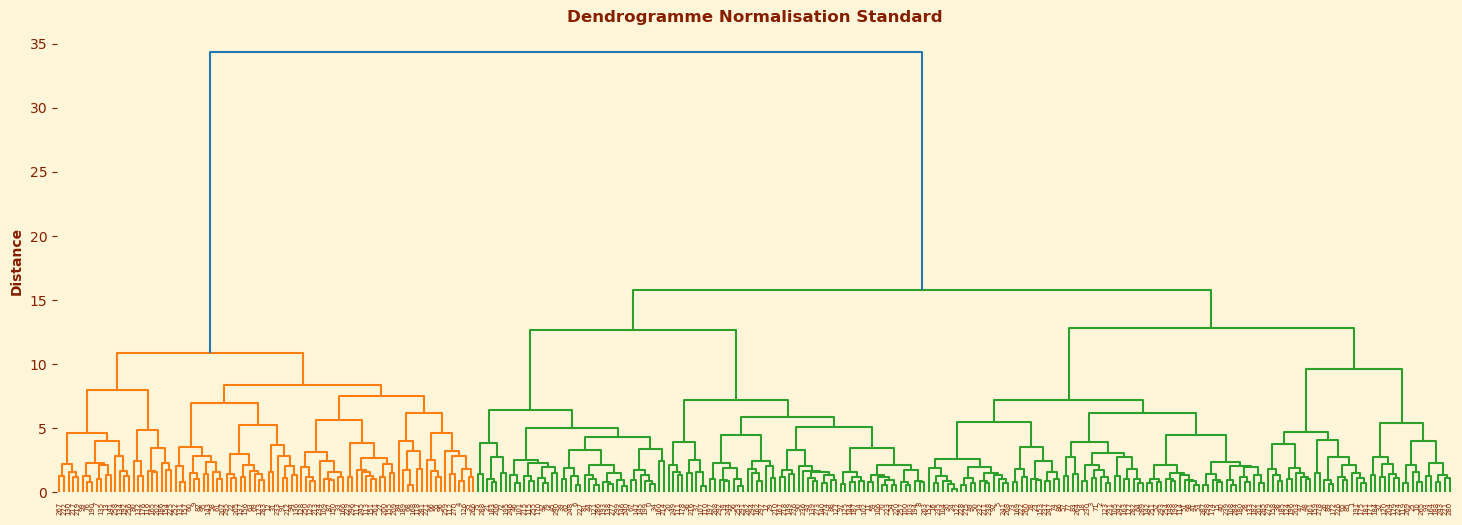

In [42]:
# Affichage du dendrogramme
NomGraphique = "Dendrogramme Normalisation Standard"
names = scaled_test_df.index
plot_dendrogram(Z1, names, NomGraphique)

<div style="background-color: RGB(255,240,193);" >
<h4 style="margin: auto; padding: 20px; color:#861D00; "> Méthode des coudes </h4>
</div>

In [43]:
from sklearn.cluster import KMeans

# Faire la courbe de l'inertie pour déterminer le nombre optimal de centroïd
X = scaled_test_df
inertia = []
K_range = range(1,10)
for i in K_range:
    model = KMeans(n_clusters = i,init='k-means++',n_init=10).fit(X)
    inertia.append(round(model.inertia_,2))

In [44]:
def plot_coudes(Z, names, NomGraphique):
    plot.figure(figsize = (18, 6)).patch.set_facecolor('#fff6d9')
    plot.gca().set_facecolor('#fff6d9') # Couleur de fond
    plot.gca().tick_params(colors='#861e00') # changement couleur des axes x et y
    plot.gca().spines[:].set_visible(False) # Masquage du cadre noir
    plot.plot(K_range,inertia)
    plot.ylabel('Distance',  color = '#861e00', fontweight = 'bold')
    plot.xlabel('Nombre de Clusters', fontsize= 10,  color = '#861e00', fontweight = 'bold')
    plot.ylabel('Somme des Inerties Intra Clusters', fontsize= 10,  color = '#861e00', fontweight = 'bold')
    plot.xticks(numpy.arange(10))
    plot.title(NomGraphique, fontsize = 16,  color = '#861e00', fontweight = 'bold')
    plot.show()

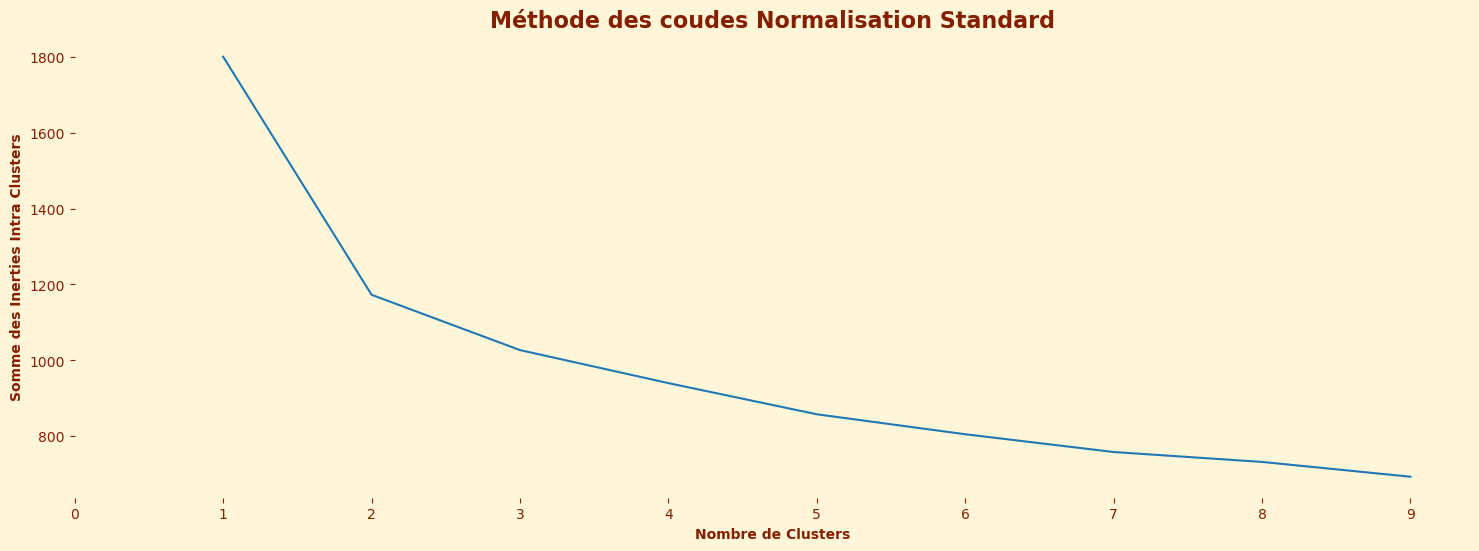

In [45]:
NomGraphique = "Méthode des coudes Normalisation Standard"
plot_coudes(K_range,inertia, NomGraphique)

Le nombre de cluster idéal est de 2 à 6 avec la méthode des coudes ce qui est ici pas si évident que cela à déterminer
Le dendrogramme annonce 2


<div style="background-color: RGB(255,240,193);" >
<h4 style="margin: auto; padding: 20px; color:#861D00; "> Prédiction KMean </h4>
</div>

In [46]:
nombre_Cluster_Ideal_Standard = 2
# Créer un modèle de regroupement par K-mean
kmeans = KMeans(init='random', n_clusters=nombre_Cluster_Ideal_Standard, n_init=10, random_state=10)
# Ajuster les données au modèle
kmeans.fit(X_train_scaled)
# Prédire les groupes de données par valeurs
clusters = kmeans.predict(X_test_scaled)
# Ajouter le numéro de clusters aux données d'orgine
X_scaled_clustered_test = panda.DataFrame(X_test_scaled, columns=feature_cols, index=test_set.index)
X_scaled_clustered_test['kmeans'] = clusters
test_set["prediction_kmean"] = X_scaled_clustered_test["kmeans"]

In [47]:
# Changer le type de données
test_set['prediction_kmean'] = test_set['prediction_kmean'].astype(bool)

In [48]:
# Afficher les données qui ne correspondent pas
test_set.loc[test_set["is_genuine"] != test_set["prediction_kmean"]]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,margin_low_prediction,is_genuine_predicted_scaled_lg,is_genuine_predicted_lg,prediction_kmean
1122,False,172.09,104.15,104.17,4.15,3.40,113.85,5.205657,True,True,True
253,True,172.07,104.33,104.33,4.41,3.39,113.39,4.044576,True,True,False
0,True,171.81,104.86,104.95,4.52,2.89,112.83,4.150546,True,False,False
1081,False,171.82,103.90,103.67,4.79,3.36,112.43,5.214134,False,False,True
1103,False,171.88,104.05,103.75,4.41,3.21,112.52,5.245925,True,True,True
728,True,171.94,104.11,104.16,4.08,3.35,111.76,4.053054,False,False,False


In [49]:
# Rapport de classification
print(classification_report(y_test, test_set['prediction_kmean']))

              precision    recall  f1-score   support

       False       0.97      0.97      0.97       100
        True       0.98      0.98      0.98       200

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



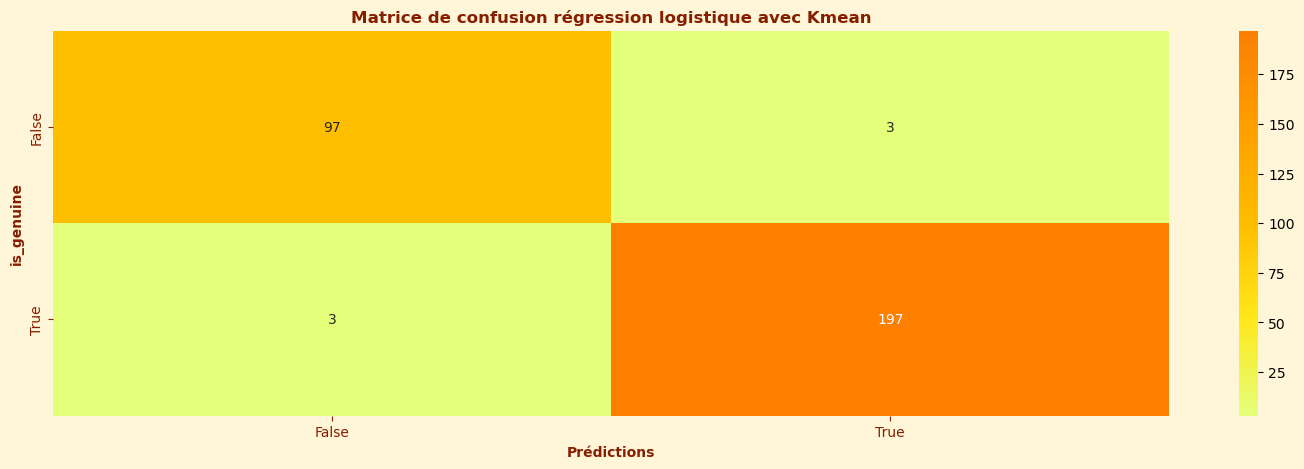

In [50]:
configuration_matrice_modeleRegressionLogistique = panda.crosstab(y_test, test_set['prediction_kmean'])

plot.figure(figsize=(18,5)).patch.set_facecolor('#fff6d9')
plot.gca().set_facecolor('#fff6d9') # Couleur de fond
plot.gca().tick_params(colors='#861e00') # changement couleur des axes x et y
plot.gca().spines[:].set_visible(False) # Masquage du cadre noir
plot.gca().tick_params(colors='#861e00') # changement couleur des axes x et y
sns.heatmap(configuration_matrice_modeleRegressionLogistique, annot=True, fmt=".3g", cmap='Wistia') # Afficher de la carte
plot.title('Matrice de confusion régression logistique avec Kmean', color = '#861e00', fontweight = 'bold') # Titre
plot.xlabel("Prédictions",  color = '#861e00', fontweight = 'bold')
plot.ylabel("is_genuine",  color = '#861e00', fontweight = 'bold')
plot.show()

<div style="background-color: RGB(255,132,39);" >
<h2 style="margin: auto; padding: 20px; color:#861D00; "> Evaluation et Interpretation </h2>
</div>

<div style="background-color: RGB(255,132,39);" >
<h2 style="margin: auto; padding: 20px; color:#861D00; "> Production </h2>
</div>

<div style="background-color: RGB(255,224,132);" >
<h3 style="margin: auto; padding: 20px; color:#861D00; "> Fonctions  </h3>
</div>

In [51]:
# fonction pour apprendre (sans données manquantes)
def learnLogReg(ld: panda.DataFrame, feature_cols: list[str], y: str):
    y_train = ld[y]
    # centrage et réduction training
    X_train_val = ld[feature_cols].values
    std_scale =  sklearn.preprocessing.StandardScaler().fit(X_train_val)
    X_train_scaled = std_scale.transform(X_train_val)
    scaled_train_df = panda.DataFrame(X_train_scaled, columns=feature_cols)
    # retourne le modèle entraîné
    return linear_model.LogisticRegression(random_state=10).fit(scaled_train_df, y_train)

# fonction pour prédire
def predictLogReg(lmLogReg: linear_model.LogisticRegression, data):
    uData = data.copy()
    feature_cols = uData.columns
    # centrage et réduction production
    X_train_val = uData[feature_cols].values
    std_scale = sklearn.preprocessing.StandardScaler().fit(X_train_val)
    X_test_scaled = std_scale.transform(X_train_val)
    scaled_test_df = panda.DataFrame(X_test_scaled, columns=feature_cols)
    to_predict = scaled_test_df[feature_cols]
    y_pred = modeleRegressionLogistique.predict(to_predict)
    y_pred_proba = modeleRegressionLogistique.predict_proba(to_predict)
    uData["prediction"] = y_pred
    pP = panda.DataFrame(y_pred_proba)
    uData["prediction_probability"] = pP[[0, 1]].max(axis=1)
    uData["prediction_probability"] = uData["prediction_probability"] * 100
    uData["prediction_probability"] = uData["prediction_probability"].astype(int)
    uData["prediction_probability"] = uData["prediction_probability"].astype(str)
    uData["prediction_probability"] = uData["prediction_probability"] + "%"
    return uData

<div style="background-color: RGB(255,224,132);" >
<h3 style="margin: auto; padding: 20px; color:#861D00; "> Analyse Dataframe  </h3>
</div>

In [52]:
# variable pour le nom du fichier à importer
nomFichier = "billets_production.csv"
fichier = panda.read_csv(filepath_or_buffer=repertoireFichierImportation + nomFichier, sep=',', header=0)

In [53]:
# Analyser les données
analyseDataframe(fichier)

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diagonal      5 non-null      float64
 1   height_left   5 non-null      float64
 2   height_right  5 non-null      float64
 3   margin_low    5 non-null      float64
 4   margin_up     5 non-null      float64
 5   length        5 non-null      float64
 6   id            5 non-null      object 
dtypes: float64(6), object(1)
memory usage: 412.0+ bytes


None


Le dataframe contient 5 Lignes et 7 Colonnes


,diagonal,height_left,height_right,margin_low,margin_up,length
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000
mean,171.840000,104.068000,103.974000,4.808000,3.172000,112.27400
std,0.225499,0.206325,0.259769,0.707404,0.097826,0.97879
min,171.520000,103.800000,103.730000,3.810000,3.070000,111.10000
25%,171.780000,103.950000,103.750000,4.390000,3.090000,111.82000
50%,171.790000,104.080000,103.990000,5.000000,3.160000,111.87000
75%,172.020000,104.170000,104.030000,5.270000,3.240000,113.19000
max,172.090000,104.340000,104.370000,5.570000,3.300000,113.39000



Le nombre de doublons dans cette table est de 0

Le nombre de valeurs manquantes par colonne dans cette table est de


diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
id              0
dtype: int64

,diagonal,height_left,height_right,margin_low,margin_up,length,id


<div style="background-color: RGB(255,224,132);" >
<h3 style="margin: auto; padding: 20px; color:#861D00; "> Régression Logistique  </h3>
</div>

In [54]:
sauv_fichier = fichier.copy()

In [55]:
# Prendre uniquement les valeurs numériques pour les données d'entrainement
X_valeur = fichier[feature_cols].values
# centrage et réduction des données d'entrainement 
standard_scaler = sklearn.preprocessing.StandardScaler().fit(X_valeur)
X_scaled = standard_scaler.transform(X_valeur)

In [56]:
# Transformer les données en Dataframe
scaled_train_df = panda.DataFrame(X_train_scaled, columns=feature_cols)

# Entrainement du modèle avec la regression logistique
modeleRegressionLogistique = linear_model.LogisticRegression(random_state=10).fit(scaled_train_df, y_train)

In [57]:
# Prendre uniquement les valeurs numériques pour les données du fichier
X_fichier_valeur  = fichier[feature_cols].values
# centrage et réduction test
standard_scaler = sklearn.preprocessing.StandardScaler().fit(X_fichier_valeur)
X_fichier_scaled = standard_scaler.transform(X_fichier_valeur)
# Transformer les données en Dataframe
scaled_fichier_df = panda.DataFrame(X_fichier_scaled, columns=feature_cols)

In [58]:
# Tester le modèle sur les données de test.
a_prevoir = scaled_fichier_df[feature_cols]
y_pred = modeleRegressionLogistique.predict(a_prevoir)
fichier["is_genuine_predicted_scaled_lg"] = y_pred

<div style="background-color: RGB(255,224,132);" >
<h3 style="margin: auto; padding: 20px; color:#861D00; "> Kmean  </h3>
</div>

In [59]:
# Créer un modèle de regroupement par K-mean
kmeans = KMeans(init='random', n_clusters=nombre_Cluster_Ideal_Standard, n_init=10, random_state=10)
# Ajuster les données au modèle
kmeans.fit(X_train_scaled)
# Prédire les groupes de données par valeurs
clusters = kmeans.predict(X_fichier_scaled)
# Ajouter le numéro de clusters aux données d'orgine
X_scaled_clustered_test = panda.DataFrame(X_fichier_scaled, columns=feature_cols, index=fichier.index)
fichier["prediction_kmean"] = clusters
# Changer le type de données
fichier['prediction_kmean'] = fichier['prediction_kmean'].astype(bool)

<div style="background-color: RGB(255,224,132);" >
<h3 style="margin: auto; padding: 20px; color:#861D00; "> Comparatif Kmean et Regression Logistique  </h3>
</div>

In [60]:
fichier

,diagonal,height_left,height_right,margin_low,margin_up,length,id,is_genuine_predicted_scaled_lg,prediction_kmean
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1,True,True
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2,False,False
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3,True,True
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4,False,False
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5,False,False


<div style="background-color: RGB(255,224,132);" >
<h3 style="margin: auto; padding: 20px; color:#861D00; "> Prédicition Finale  </h3>
</div>

In [61]:
# Apprendre 
y_pred = learnLogReg(training_set, feature_cols, y="is_genuine")

In [62]:
# Prédire 
sauv_fichier = sauv_fichier.drop(columns = ['id'], axis = 1)
predictLogReg(y_pred, sauv_fichier)

,diagonal,height_left,height_right,margin_low,margin_up,length,prediction,prediction_probability
0,172.09,103.95,103.73,4.39,3.09,113.19,True,99%
1,171.52,104.17,104.03,5.27,3.16,111.82,False,93%
2,171.78,103.80,103.75,3.81,3.24,113.39,True,99%
3,172.02,104.08,103.99,5.57,3.30,111.10,False,99%
4,171.79,104.34,104.37,5.00,3.07,111.87,False,72%
